# A VIEW OF  WHAT WE ARE GOING TO COVER:

1. An End-end sci-kit Learn workflow.
2. Choose the right estimator or algorithm for our problem.
3. Fit the Model/Algorithm and use it to make predictions on our data.
4. Evaluating a Model.
5. Improve a Model.
6. Save and Load a Trained Model.
7. Putting it all together.

## Getting Our Data Ready to be Used by ML.

In [1]:
#get the data
import pandas as pd
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X  (Feature Matrix)

x = heart_disease.drop("target", axis=1) # all the columns excep target.

# create y (label)
y = heart_disease["target"]

In [6]:
#import numpy as np

## Choose the rght algorithm for your problem

This is a classification problem so we use `ensemble` Methods on `RandomForestClassifier`

In [7]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# we keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Fit the Model/Algorithm and use it to make predictions on our data.

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
clf.fit(x_train,y_train)  #fit the model to learn new patterns

RandomForestClassifier()

In [10]:
### Make Prediction
### You can only make prediction with data that has same array.

y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

## Evaluating a Model.

In [11]:
clf.score(x_train,y_train) #Train score

1.0

In [12]:
clf.score(x_test,y_test) #Test score , it does learned well about the data

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
print(classification_report(y_test,y_pred)) #Compare the y_test and the prediction labels.

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [15]:
confusion_matrix(y_pred,y_pred) #Compare the y_test and the prediction labels.

array([[28,  0],
       [ 0, 33]], dtype=int64)

In [16]:
accuracy_score(y_test,y_pred) #Compare the y_test and the prediction labels.

0.7868852459016393

In [17]:
## All  the above return same range of scoress. 
## So lets Improve the model.

In [18]:
import numpy as np

## Improve a Model.

In [19]:
### Try different amount of n_estimators/algorithm

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying Model with {i} estimator..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model Accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

Trying Model with 10 estimator..
Model Accuracy on test set:83.61%
 
Trying Model with 20 estimator..
Model Accuracy on test set:77.05%
 
Trying Model with 30 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 40 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 50 estimator..
Model Accuracy on test set:78.69%
 
Trying Model with 60 estimator..
Model Accuracy on test set:77.05%
 
Trying Model with 70 estimator..
Model Accuracy on test set:78.69%
 
Trying Model with 80 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 90 estimator..
Model Accuracy on test set:78.69%
 


## Save model and Load it.

In [21]:
import pickle

#pickle.dump(clf,open("Model/random_forest_model_1.pkl","wb")) # wb-web binary

In [22]:
load_model =  pickle.load(open("Model/random_forest_model_1.pkl", "rb")) #read binary
load_model.score(x_test,y_test)

0.9344262295081968

# GOING THROUGH THE ABOVE STEPS IN DETAILS 

BREAKING DOWN THE STEPS ABOVE.

## Getting Our Data Ready to be used by Machine Learning.

 1. Spli the data into Features and Labels(Usually `X` and `Y`)
 2. Filling (also called inputing) or disgarding missing values.
 3. Converting non-numericals to numerical values (also call feature encoding)

In [23]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
#features
x = heart_disease.drop(["target"], axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
#labels
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
## Splitting the data into train set ans test set

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [27]:
x_train.shape,x_test.shape,y_train.shape,x_test.shape

((212, 13), (91, 13), (212,), (91, 13))



### Converting non-numericals to numericals
 the data set above is Numerical already so lets import another one

In [28]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
# split the data
x = car_sales.drop(["Price"],axis=1)
y = car_sales["Price"]

#splitting into train set and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
## Build a Machine learnig model to make prediction
## the regressor can predict numbers

from sklearn.ensemble import RandomForestRegressor

model =  RandomForestRegressor()

model.fit(x_train,y_train)
model.score(x_test,y_test)

#code wont run be machine model only understand numbers, see code below.

ValueError: could not convert string to float: 'Toyota'

### Turn Category to numbers
The `Doors` Column is included because 4,5,7 are categorised.

In [31]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")


tranformer_x = tranformer.fit_transform(x)

tranformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
## put it into a data set
pd.DataFrame(tranformer_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


### Anothe way to turn non-numericals to numericals

In [33]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [34]:
## NOW, let's refit our model above with the numerical (transformer_x)
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(tranformer_x,y,test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
model.score(x_test,y_test)

0.3235867221569877

### Removing missing values

 1.fill in the missing values(inputution)
 2.remove the missing values all together.

In [36]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
#### Fill missing values 

car_sales_missing["Make"].fillna("missing",inplace=True) #make
car_sales_missing["Colour"].fillna("missing",inplace=True) #colour
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
#Remove the remaining mssing values in Price
car_sales_missing.dropna(inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
## Split the data

x  = car_sales_missing.drop(["Price"],axis=1)
y  = car_sales_missing["Price"]

In [43]:
## NB.OneHotEncoder class was upgraded to be able to handle None & NaN values.
## So the code below will run without an error.
## for the seek of practice the NaN values where removed.

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

## Transform the car_sales_missing to Numericals
tranformer_x = tranformer.fit_transform(car_sales_missing)

tranformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Removing and filling missing values with sklearn.

In [44]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
# Check missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

The data is split into train and test before any filling missing values or transformations take place.

In [47]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [48]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [49]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set.

In [50]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

No more missing values!

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.

Again, keeping our training and test data separate.

In [52]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

Fit a model

Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [53]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

the model above performed poor to the previous one because the dataset is small let's see below

In [54]:
#campere the lenth of the two dataset used.
len(car_sales_missing),len(car_sales)

(950, 1000)

## Choose the Right Estimator/Algorithm for your problem

> SOME THINGS TO NOTE:

> 1.SKLEARN REFERS TO MACHINE LEARNING MODEL, ALGORITHMS AS ESTIMATORS

> 2.CLASSIFICATION PROBLEM PREDICTING A CATEGORY(HEART DISEASES OR NOT)

> 3.SOMETIMES YOU'LL SEE `clf`(SHORT FOR CLASSIFIER) USED FOR CLASSIFICATION ESTIMATOR

> 4.REGRESSION PREBLOM PREDICTING A NUMBER (SELLING PRICE OF A CAR)


###  Regression. Problem

IF YOUR NOT SURE ABOUT WHAT MODEL YOU SHOULD USE THEN LOOK AT THE ML MAP. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [55]:
### Get california dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing


## the data contains the numerical values
## the feature_names contains the attributes 
## the target values has an attribute  target_names:["MedHouseVal"]

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [56]:
## we are tying to predict the features_names againts the target which has an  target_names['MedHouseVal']
## Lets put the dataset into a DataFrame.#


housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
## Lets add the target values to it attribute MedHouseVal in the df above

housing_df['MedHouseVal'] = housing["target"]
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
## lets rename the column back to target

housing_df['Target'] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [59]:
## Drop the previous column
housing_df = housing_df.drop(["MedHouseVal"], axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
#Import Algorithm/Estimator
from sklearn.linear_model import Ridge

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  housing_df.drop(["Target"], axis=1)
y = housing_df["Target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = Ridge()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440128

WHAT IF `Ridge` DIDNT WORK OR THE SCORE DIDNT FIT OUR NEED'S

WELL, WE COULD ALWAYS TRY A DIFFERENT MODEL...

HOW ABOUT `ensemble Model`( AN ENSEMBLE MODEL IS A COMBINATION OF SMALLER MODELS TO TRY AND MAKE BETTER PREDCITION THAN JUST A SINGLE MODEL.)

SKLEARN ENSEMBLE MODEL CAN BE FOUND HERE: https://scikit-learn.org/stable/modules/ensemble.html

In [61]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestRegressor

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  housing_df.drop(["Target"], axis=1)
y = housing_df["Target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestRegressor()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)


### that's diffinetely the best score.. 
### 100 smaller estimators run through 
### the score is 80% which is much more better.

0.8065734772187598

### Classification problem

LET'S LOOK AT THE MAP https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

The Map says we should try Support Vector Manchines `SVMs`

In [62]:
### get the data

heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
## import the algorithm
from sklearn.svm import LinearSVC

##Set Random seed()
np.random.seed()

## Make Data
x =  heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the Data
x_train,x_test,y_train,y_test,= train_test_split(x,y,test_size=0.2)

## instantiate and fit the model
modele =LinearSVC()
model.fit(x_train,y_train)

##Evaluate our LinearSVC
model.score(x_test,y_test)

0.36969414414414437

That's a Small Score Evaluation, So we will try an emsemble Method.

Things to Note:

1. structured Data (Regression/Classification Problem) Used `Ensemble` Methods they Perform Better.
2. Unstructured Data used Deep learning or Transfer Learning. 

In [64]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

## Once Again we can see that the Ensemble Methods perform better on Structured data.

0.8524590163934426

## Fit the Model/Algorithm into Our Data and use it to make prediction.

### Fitting the model.

Names for :
* `x`: Features, Feature Variables, Data
* `y`: Labels, Target Variables, Target

In [65]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()

#FITTING THHE MODEL(Trainnning our Model)
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

0.8524590163934426

### Make Prediction from the train model.

#### Prediction on Classification model

There are two ways to do this:

* `Predict()`
    
* `predict_proba()`


In [66]:
## When making Prediction the test_set must be in the same shape as the train set.  

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [67]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [68]:
## Making Prediction
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
### compare the prediction to the truth labels to evaluate the model.
### I.e,comparing the prediction to the origal test_set
y_pred = model.predict(x_test)
np.mean(y_pred==y_test)

0.8524590163934426

In [70]:
 ## another way
model.score(x_test,y_test)

0.8524590163934426

In [71]:
## another way
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8524590163934426

FROM ABOVE IT CAN BE SEEN THAT 
THREE DIFFERENT WAYS RETURN SAME SCORE.

 `predict_proba()` returns the probabilities on Classification labes.

In [72]:
model.predict_proba(x_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

#### Making prediction on our regresion model

In [73]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

#make prediction

y_pred = model.predict(x_test)

In [75]:
y_pred[:10]

array([2.9907601, 1.23721  , 2.40387  , 0.72139  , 3.2238003, 3.8266918,
       3.6251107, 1.92314  , 1.86079  , 0.79598  ])

In [76]:
np.array([y_test])

array([[3.326, 1.188, 2.292, ..., 0.888, 2.142, 0.678]])

In [77]:
## comparing the prediction to it's true value
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

0.33164055910852736

## Evaluating Our Machine Leanrnig Model

THERE ARE THREE WAYS OF EVALUATING THE ML MODELS:
* Estimator built-in score() method
* The Scoring parameter
* The Problem specific  Metric functions

You can read more here. https://scikit-learn.org/stable/modules/model_evaluation.html

###  Estimator built-in score() method

In [78]:
#### on CLASSIFICATION PROBLEM

#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()

#FITTING THHE MODEL(Trainnning our Model)
model.fit(x_train,y_train)


RandomForestClassifier()

In [79]:
## Checking the scores on train set
model.score(x_train,y_train)

1.0

In [80]:
## checking the score on test set
model.score(x_test,y_test)

0.8524590163934426

In [81]:
## On a Regression Problem

## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
## score on train set
model.score(x_train,y_train)

0.9731268764976055

In [83]:
## score on test set
model.score(x_test,y_test)

0.8129476252870773

* `Dependent Variable`: The Dependent Variable is the `Target`, depending on the Features

* `Independent Variable`: The Independent Variable is are Feature, which are going to be predicted upon the target

The `test_set` is what matters most when deploying the model into an  application

 ### Evalaating a  model using the `Scoring` parameter (Coss Validation)
 
model_evaluation tool using the `Cross Validation`, which instead of picking the single score, it's split the training and test set into many `fold` and return the diiferent scores. you can find the find the mean of the cross validation to enable you get the score accuracy.

read here for more https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [84]:
### Importing the cross validation 
from sklearn.model_selection import cross_val_score

## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
### the built-in score method
model.score(x_test,y_test)

0.8074471099960192

In [86]:
### Cross valiation
## the crass validation takes the model and the initial feature and labels and split into folds and return the scores
cross_val_score(model,x,y,cv=5)

array([0.50019319, 0.70409933, 0.73999316, 0.61271565, 0.68058916])

`THE IMAGE BELOW SHOWS HOW CROSS VALIDATION WORKS`

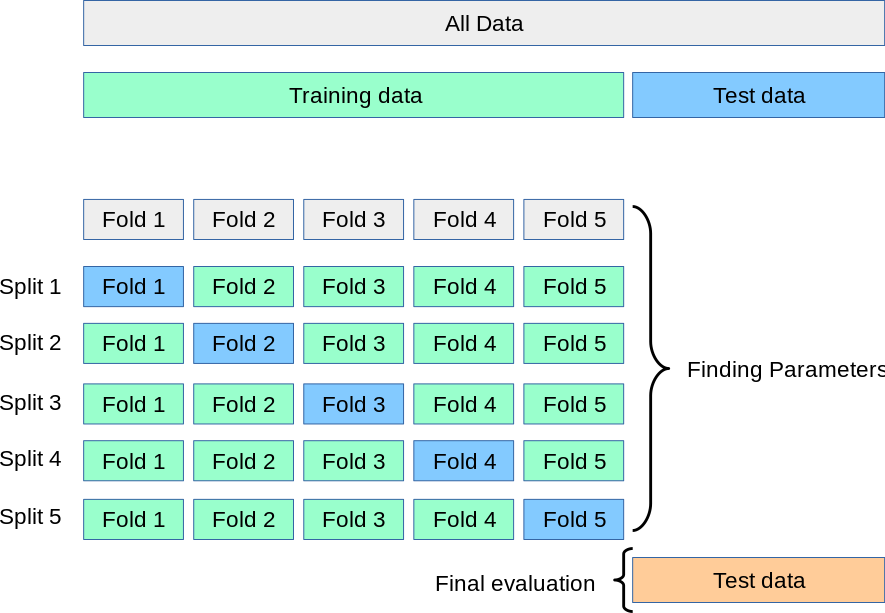

In [87]:
from IPython import display
display.Image("https://scikit-learn.org/stable/_images/grid_search_cross_validation.png") 

In [88]:
## lets incrase the number of split/folds to 10.
cross_val_score(model,x,y,cv=10)

array([0.26084151, 0.68223966, 0.72372543, 0.69653966, 0.7665796 ,
       0.6961568 , 0.51106079, 0.59569346, 0.48141573, 0.70009378])

In [89]:
### lets comper with a single score validation

## set radom seed()
np.random.seed(42)

## single score  or built-in score evaluation

model_single_score = model.score(x_test,y_test)


##find the mean of cross valiadtion
model_cross_val = np.mean(cross_val_score(model,x,y,cv=5))


## compare the single score and the cross validation

model_single_score, model_cross_val

## if you are ask to get the accurate score. defo the cross val. mean accuracy will be best.

(0.8074471099960192, 0.6520824166120266)

### Evaluating a Classification model 

1.Accuracy 

2.Are unde ROC Curve

3.Confusion Metrix

4.Classification report


#### Accuracy

In [124]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


model = RandomForestClassifier()
cross_val_score = np.mean(cross_val_score(model,x,y,cv=5))
cross_val_score

0.8150273224043716

In [126]:
print(f"Heart Disease Classifier Cross Validation Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross Validation Accuracy: 81.50%


#### Area Under Curve(AUC) & Receiver operating characteristic curve (/ROC)

ROC Curve: ara comparison of a model true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predict 1 when truth is 1
* False Positive = Model Predict 1 when truth is 0
* True Negative =  model predict 0 when truth is 0
* False Negative =  Model predict 0 when trus is 1

> NOTE:

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

* For more information on these metrics, bookmark the following resources and refer to them when you need:

* ROC and AUC, Clearly Explained! by StatQuest
 
* nROC documentation in Scikit-Learn (contains code examples)

* How the ROC curve and AUC are calculated by Google's Machine Learning team


**Receiver operating characteristic curve (/ROC)**

In [127]:
## import roc_curve
from sklearn.metrics import roc_curve

### mak the data
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)


## fit the model
model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict_proba(x_test)
y_pred[:10],

(array([[0.44, 0.56],
        [0.87, 0.13],
        [0.16, 0.84],
        [0.66, 0.34],
        [0.05, 0.95],
        [0.33, 0.67],
        [0.07, 0.93],
        [0.3 , 0.7 ],
        [0.85, 0.15],
        [0.16, 0.84]]),)

In [128]:
### Now lets get the true positive 
## this will return on the floats on the rigth which are the true positive 

y_prob_positive  =y_pred[:,1]
y_prob_positive[:10]

array([0.56, 0.13, 0.84, 0.34, 0.95, 0.67, 0.93, 0.7 , 0.15, 0.84])

In [129]:
### calculate the fpr,tpr and threshold

fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08695652, 0.13043478, 0.13043478,
       0.17391304, 0.17391304, 0.2173913 , 0.34782609, 0.34782609,
       0.39130435, 0.39130435, 0.43478261, 0.56521739, 0.60869565,
       0.7826087 , 0.91304348, 1.        ])

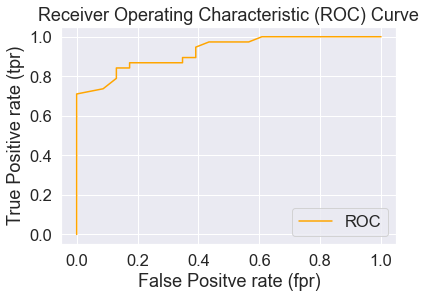

In [130]:
import matplotlib.pyplot as plt

### Creating a Function to plot a ROC Curve.

def plot_roc_curve(fpr,tpr):
    """
    plot a roc curve giving the false positive rate(fpr) and true positive rate(tpr) of a giving model 
    """
    ### plot the roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    ### Plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    ##plot style
    plt.xlabel("False Positve rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)
    

**Area Under Curve(AUC)**

In [131]:
## that Area under the curve for the plot above.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_positive)

0.9256292906178489

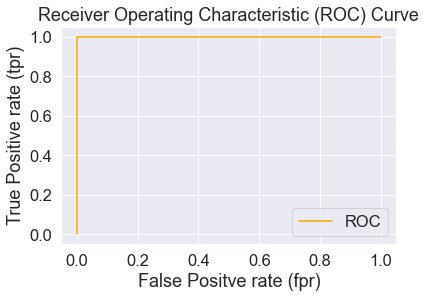

In [132]:
##Plot the perfect curve
fpr,tpr,threshold =  roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

## this is how a perfect curve looks like. 
#Not possible

In [133]:
## Evaluating the Curve above with AUC.

roc_auc_score(y_test,y_test)

1.0

#### Confusion Metrix

confusion metrix is a quick way to compare the lables a model predicts and the actually lables it was supposed to predict,
in essence giving you an idea of where the model got confused.

In [134]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[19,  4],
       [ 5, 33]], dtype=int64)

In [135]:
### plot the above on a Crosstab to Visalize properly

pd.crosstab(y_test,
           y_pred,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,19,4
1,5,33


**Creating a Confusion matrix using Sklearn**

Reading more here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

* You can either used `from_estimator` or `from_predictions`.

`from_estimator`: takes the model, feature(x) & lable(y)

`from_predictions`: takes the y_true(y_test) and the prediction y_pred

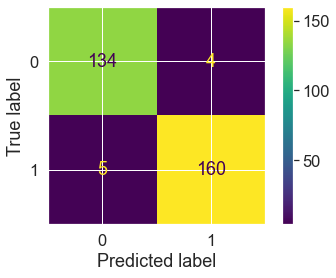

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay


##from_estimator
ConfusionMatrixDisplay.from_estimator(model,x,y)

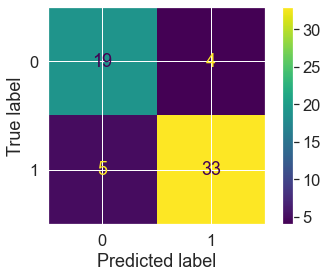

In [141]:
##from_prediction

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#### Classification report 

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.89      0.87      0.88        38

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.85      0.85        61



In [149]:
### Where classification metrix becomes useful.

disease_true = np.zeros(1000) #1k people 

disease_true[0] = 1 # first index has a the disease

disease_predict = np.zeros(1000) # model has learn everthing about the data

## Now, Using the classification report to find the 1 tru value

pd.DataFrame(classification_report(disease_true,
                                   disease_predict,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000
